In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

from messari.messari import Messari

messari = Messari()

In [ ]:
# Global settings for data downloads
assets = ['btc']
start = '2019-06-01'
end = '2022-07-30'

In [ ]:
# Download price timeseries data
# (Only supports a single metric at a time, so we need to make two calls)

metric = 'price'
df = messari.get_metric_timeseries(asset_slugs=assets, asset_metric=metric, start=start, end=end)

btc_price = df['btc']['close']
# Store the closing price

In [ ]:
# Download exchange supply data
metric = 'exch.sply'
df = messari.get_metric_timeseries(asset_slugs=assets, asset_metric=metric, start=start, end=end)

df.rename(columns={'btc': 'exchange-balance'}, inplace=True)
# Rename to exchange balance

df['price'] = btc_price
# Add bitcoin price to the exchange-balance dataframe

In [ ]:
df.tail()

In [ ]:
# Function for addidng a source watermark on the plot.
def source(src_string, fontsize=12):
    ax = plt.gca()
    props = dict(alpha=0)
    ax.text(0.0, -0.12, 
            f"Source(s): {src_string}", 
            transform=ax.transAxes, 
            fontsize=fontsize, 
            verticalalignment='bottom', 
            bbox=props
           )     

In [14]:
# Default figure settings. 
plt.rcParams['figure.figsize'] = (12,7)
plt.rcParams['figure.subplot.left'] = 0.07
plt.rcParams['figure.subplot.right'] = 0.93
plt.rcParams['figure.subplot.top'] = 0.92


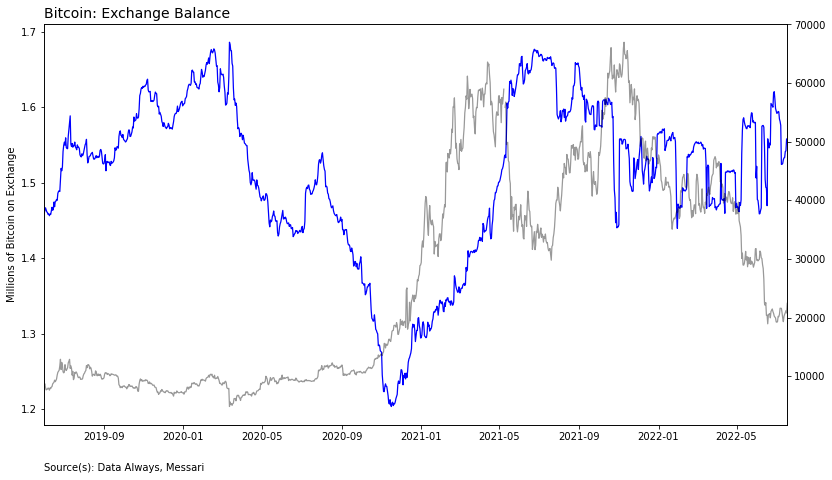

In [15]:

fig, ax = plt.subplots()
plt.title('Bitcoin: Exchange Balance', loc='left', size=14)
ax.plot(df['exchange-balance']/10**6, color='b', lw=1.25)
ax.set_ylabel('Millions of Bitcoin on Exchange')

ax2 = ax.twinx()
ax2.plot(df['price'], color='k', alpha=0.4, lw=1.25)
ax2.set_xlim(df.index[0], df.index[-1])

source('Data Always, Messari', fontsize=10)
plt.savefig('btc-exchange-balance.png', transparent=False, facecolor='white')
plt.show()

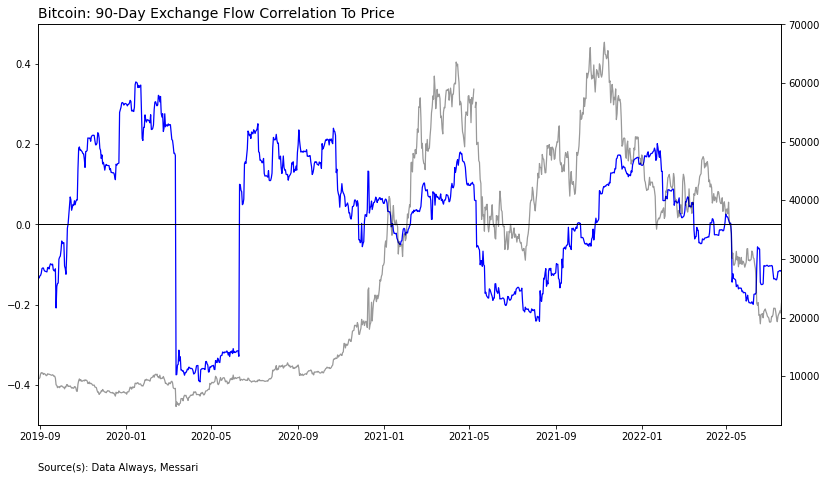

In [16]:
ws = 90
df['flow-corr'] = df['price'].pct_change().rolling(ws).corr(df['exchange-balance'].pct_change())

fig, ax = plt.subplots()
plt.title(f'Bitcoin: {ws}-Day Exchange Flow Correlation To Price', loc='left', size=14)
ax.plot(df['flow-corr'], color='b', lw=1.25)
ax.axhline(linewidth=1, color='black')
ax.set_ylim([-0.5, 0.5])

ax2 = ax.twinx()
ax2.plot(df['price'], color='k', alpha=0.4, lw=1.25)
ax2.set_xlim(df.index[ws], df.index[-1])

source('Data Always, Messari', fontsize=10)
plt.savefig('btc-exch-flow-correlation.png', transparent=False, facecolor='white')
plt.show()